# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Use random.uniform() to ensure a homogenized random sample across lat and lon
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # add api key and units choice of metric
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | patacamaya
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | muang phonsavan
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | moapa valley
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | kuching
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | xinyuan
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | happy valley-goose bay
Processing Record 21 of Set 1 | sinsang-ni
Processing Record 22 of Set 1 | talnakh
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,20.16,81,96,3.20,BR,1690388381
1,waitangi,-43.9535,-176.5597,9.43,68,85,11.33,NZ,1690388877
2,patacamaya,-17.2333,-67.9167,12.68,8,0,4.08,BO,1690388723
3,cabo san lucas,22.8909,-109.9124,31.95,66,75,2.57,MX,1690388877
4,muang phonsavan,19.4500,103.2167,20.19,93,43,0.84,LA,1690388877


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,20.16,81,96,3.20,BR,1690388381
1,waitangi,-43.9535,-176.5597,9.43,68,85,11.33,NZ,1690388877
2,patacamaya,-17.2333,-67.9167,12.68,8,0,4.08,BO,1690388723
3,cabo san lucas,22.8909,-109.9124,31.95,66,75,2.57,MX,1690388877
4,muang phonsavan,19.4500,103.2167,20.19,93,43,0.84,LA,1690388877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
# pull date from first Date record for date in figure titles
timestamp = city_data_df.at[city_data_df.index[1], "Date"]
date_time = datetime.fromtimestamp(timestamp)
date = date_time.strftime("%Y-%m-%d")


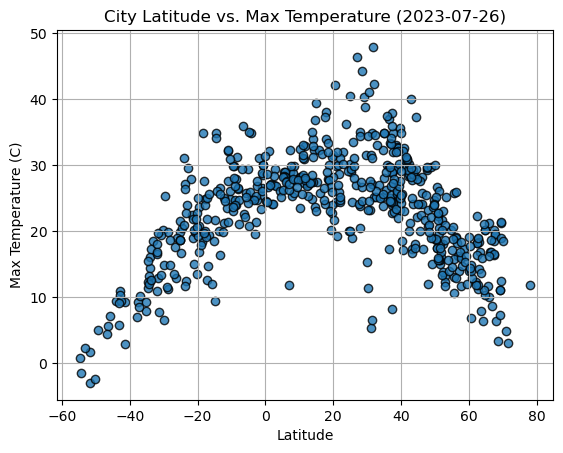

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({date})")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

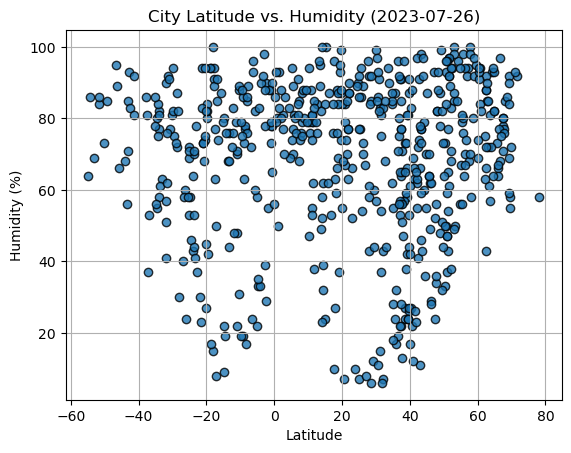

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

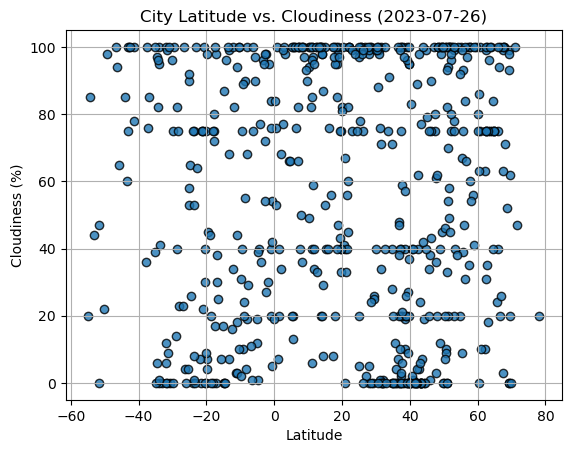

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

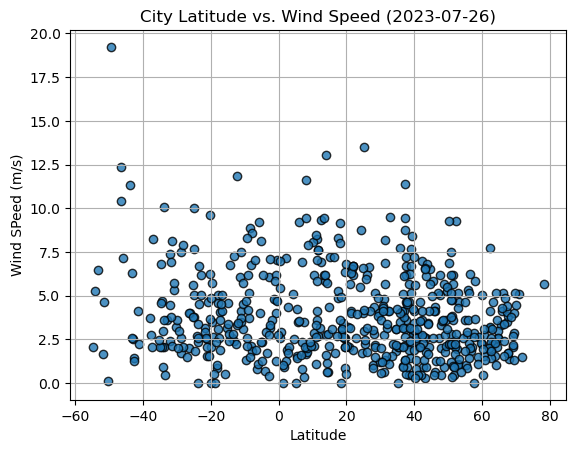

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind SPeed (m/s)')
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
# definition takes (3) paramters: <dataframe with data>, <column name for x values Series>, <column name for y values Series>
def plot_linregress(df, x_val, y_val):
    x = df[x_val]
    y = df[y_val]

    # Perform a linear regression
    (slope, y_int, r_value, p_value, std_err) = linregress(x, y)
    line_eq = f"y = {round(slope,2)} x + {round(y_int,2)}"
    reg_values = x * slope + y_int
    
    # plot scatter
    plt.scatter(x, y, alpha=0.85)
    # plot linear regression line
    plt.plot(x, reg_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel("Latitude")
    plt.ylabel(y_val)
    plt.annotate(line_eq, ((x.min()+10), (y.min()+5)), fontsize=15, color="red")

    # Print r-value
    print(f"The r-value is: {r_value**2}")

    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cabo san lucas,22.8909,-109.9124,31.95,66,75,2.57,MX,1690388877
4,muang phonsavan,19.4500,103.2167,20.19,93,43,0.84,LA,1690388877
5,tiksi,71.6872,128.8694,3.04,92,47,1.49,RU,1690388349
6,moapa valley,36.5805,-114.4703,36.97,19,7,0.95,US,1690388876
9,yellowknife,62.4560,-114.3525,22.29,43,75,7.72,CA,1690388335


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,20.16,81,96,3.20,BR,1690388381
1,waitangi,-43.9535,-176.5597,9.43,68,85,11.33,NZ,1690388877
2,patacamaya,-17.2333,-67.9167,12.68,8,0,4.08,BO,1690388723
7,ushuaia,-54.8000,-68.3000,0.81,64,20,2.06,AR,1690388710
8,margaret river,-33.9500,115.0667,12.42,82,100,10.04,AU,1690388395


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.356874026984617


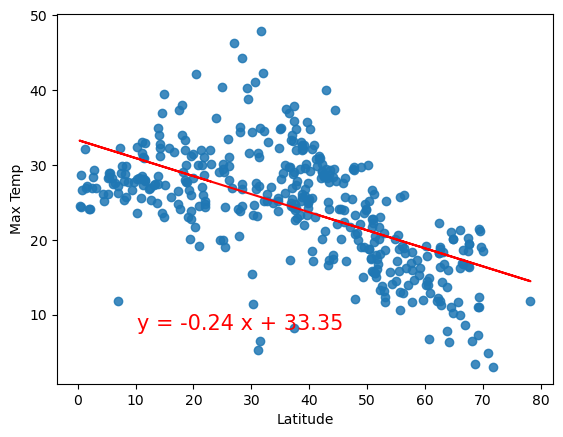

In [40]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.6918546201834171


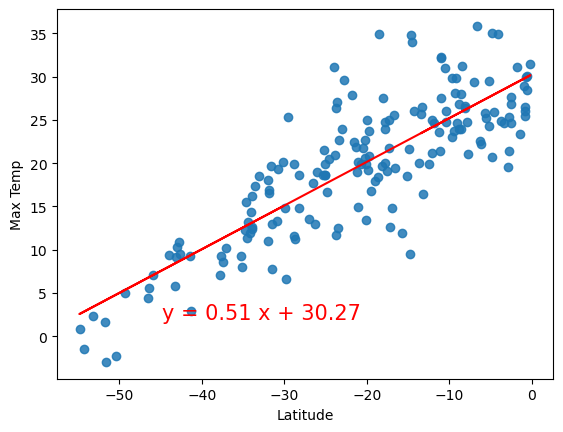

In [41]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:**

When reviewing the current linear regression data for cities of the northern and southern hemispheres, ("Latitude" vs "Max Temp"), it appears there is a correlation between a city's latitiudinal distance from the equator (latitude = 0) and it's Max Temp.

While this correlation is more strongly represented in the southern hemisphere, it is still present as a weak/moderate negative correlation (away from the equator) in the northern hemisphere, and the stronger positive correlation (towards the equator in the southern hemisphere).

It is possible the annual seasons may have an effect on the fluctuation of these correlations. While the most recent data depicts a summer month of the northern hemisphere, it also represents a period when the the planet has moved further from the sun, possibly showing a milder range of Max Temps in the northern hemisphere.

To verify the correlations, additional datasets should be examined throughout the year.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.000290654155701613


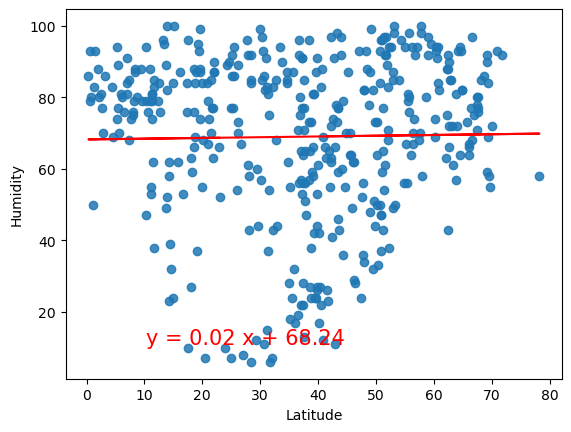

In [48]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.014387337887028097


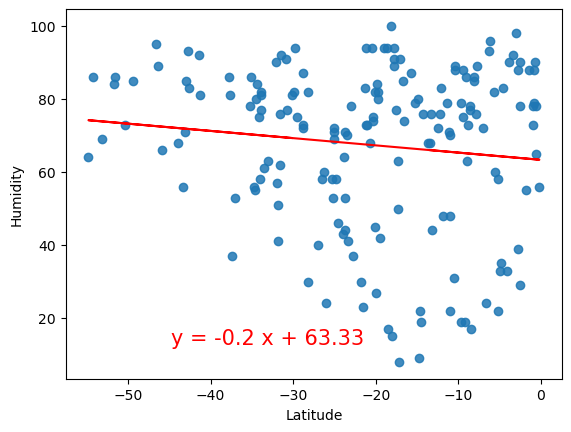

In [43]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:**

The linear regression data and r-values of both the northern and southern hemispheres, appear to show no correlation between a city's humidity and its latitude.

Neither the northern nor southern hemisphere show even a weak correlation. While the southern hemisphere may have a slight negative slope to the best fit line, the r-value clearly shows there is not a correlation in this dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007261505388071299


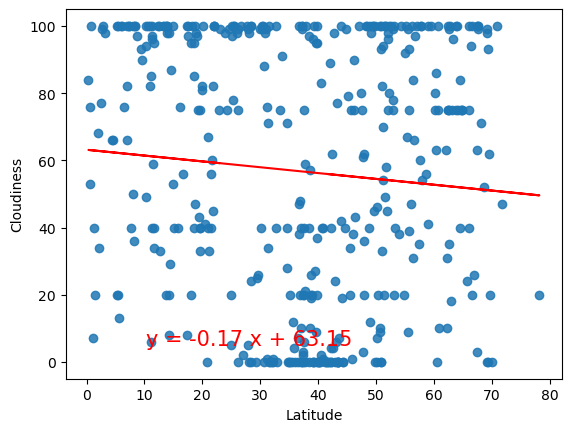

In [44]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.009028481444079521


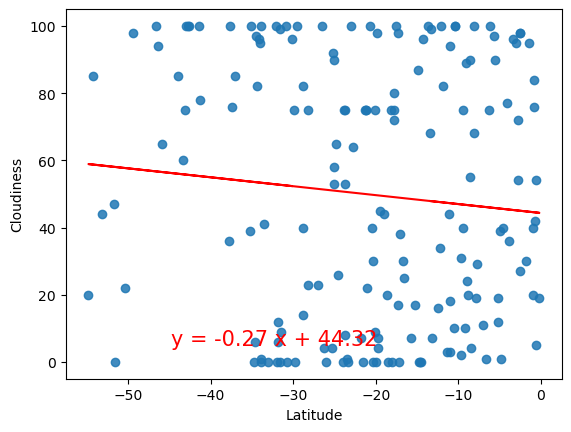

In [45]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:**

Much the same as with the previous 'Latitude vs Humidity' data, the data for both the northern and southern hemisphere is widely spread and there appears to be no correlation between a city's latitude and its recorded percentage of cloudiness in the current dataset.

Additional datasets should be collected throughout the year to see if there are annual periods which may show more/less cloudiness, and whether those percentages show a correlation to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027034054966925916


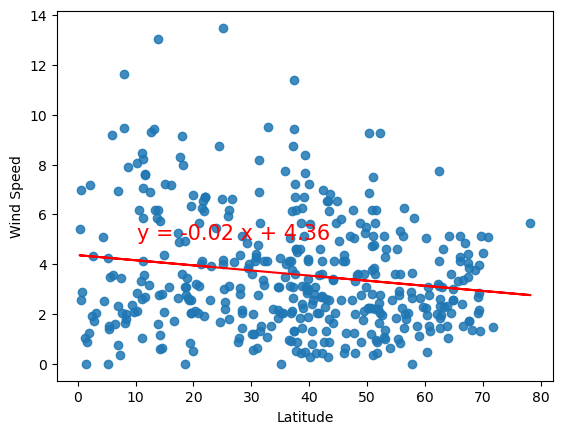

In [46]:
# Northern Hemisphere
plot_linregress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.012059700208507076


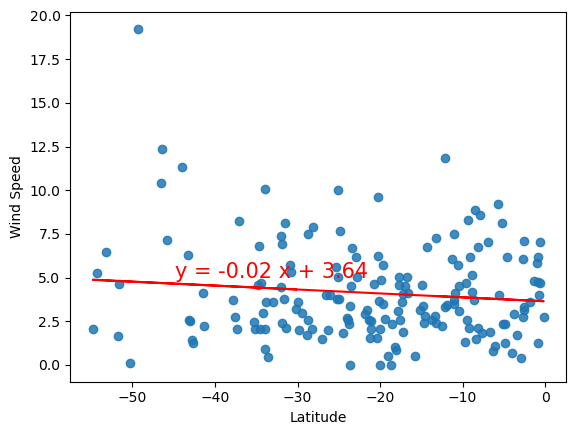

In [47]:
# Southern Hemisphere
plot_linregress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:**

Again we see via the spread of the data and the r-values, there appears to be no correlation between a city's latitude and the observed wind speed in the current data set.

It is recommended additional datasets be collected throughout the year to verify if seasonal weather patterns may play a role and furhter illuminate any possible correlations between latitude and wind speed.